# Skin Segmentation Project


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.externals.six import StringIO  
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV



import statsmodels.api as sm
import statsmodels.formula.api as smf


%matplotlib inline
plt.style.use('seaborn-white')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


# The Skin Segmentation Dataset

In [ ]:
#Loading the dataset
data = pd.read_excel('Skin.xlsx')


#Defining features and output
X = data.drop("C",1)   #Feature Matrix
y = data["C"]          #Target Variable
print(X)
print(y)

        Blue  Green  Red
0         74     85  123
1         73     84  122
2         72     83  121
3         70     81  119
4         70     81  119
...      ...    ...  ...
245052   163    162  112
245053   163    162  112
245054   163    162  112
245055   163    162  112
245056   255    255  255

[245057 rows x 3 columns]
0         1
1         1
2         1
3         1
4         1
         ..
245052    2
245053    2
245054    2
245055    2
245056    2
Name: C, Length: 245057, dtype: int64


In [ ]:
#Separate dataset into test and training
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(171539, 3)


# a) Data Set Description

In [ ]:
data.head()
#There are 4 inputs(Blue,Green,Red) and one output(C)

,Blue,Green,Red,C
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


Information about the dataset

In [ ]:
data.info()
#There is no NA in dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245057 entries, 0 to 245056
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype
---  ------  --------------   -----
 0   Blue    245057 non-null  int64
 1   Green   245057 non-null  int64
 2   Red     245057 non-null  int64
 3   C       245057 non-null  int64
dtypes: int64(4)
memory usage: 7.5 MB


Shape and size of dataset

In [ ]:
print("shape",data.shape)

shape (245057, 4)


In [ ]:
data.var()

Blue     3875.766300
Green    3592.947119
Red      5265.267774
C           0.164468
dtype: float64

In [ ]:
data.describe()

,Blue,Green,Red,C
count,245057.000000,245057.000000,245057.000000,245057.000000
mean,125.065446,132.507327,123.177151,1.792461
std,62.255653,59.941197,72.562165,0.405546
min,0.000000,0.000000,0.000000,1.000000
25%,68.000000,87.000000,70.000000,2.000000
50%,139.000000,153.000000,128.000000,2.000000
75%,176.000000,177.000000,164.000000,2.000000
max,255.000000,255.000000,255.000000,2.000000


# B) Dataset Visualization

Histogram 

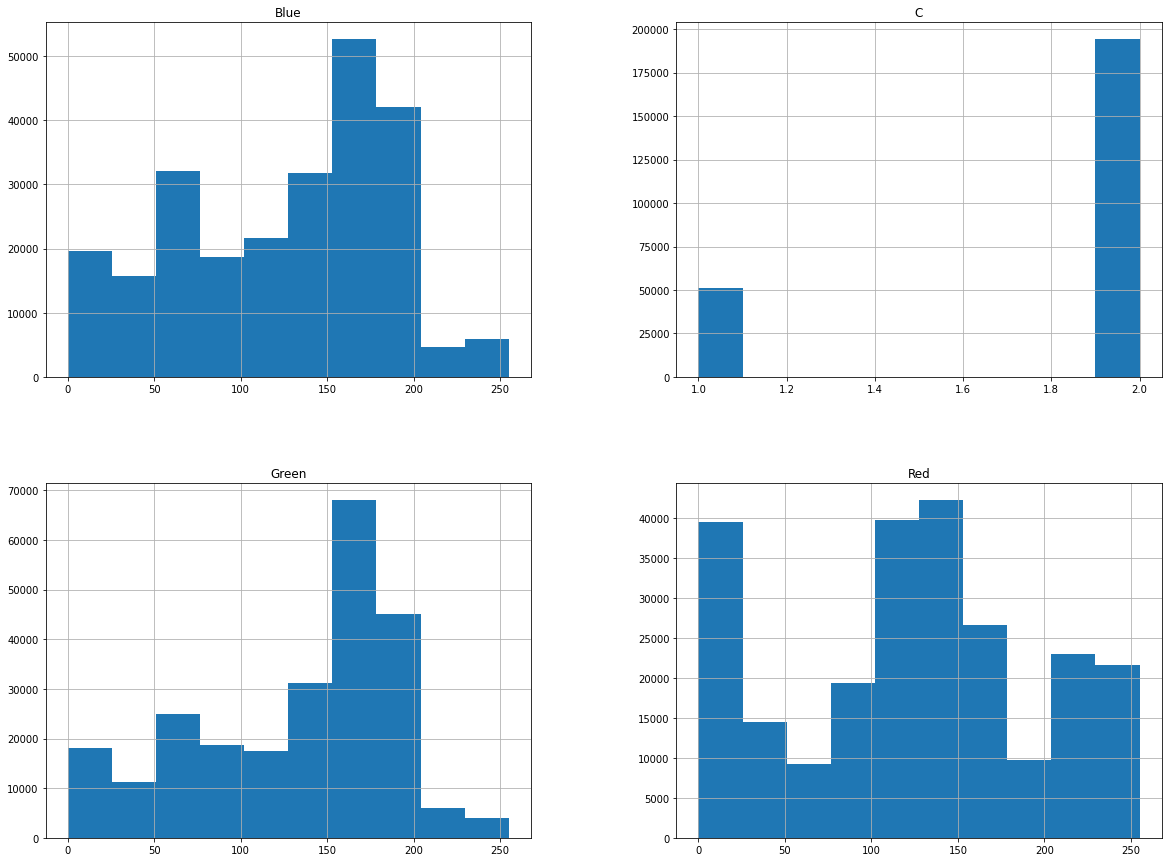

In [ ]:
#plotting histogram plot
%matplotlib inline            
import matplotlib.pyplot as plt
data.hist(bins = 10, figsize = (20,15))
plt.show()

Boxplot

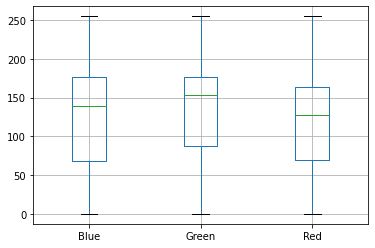

In [ ]:
#plotting boxplot
data.boxplot(column=['Blue', 'Green','Red'])

Scatter

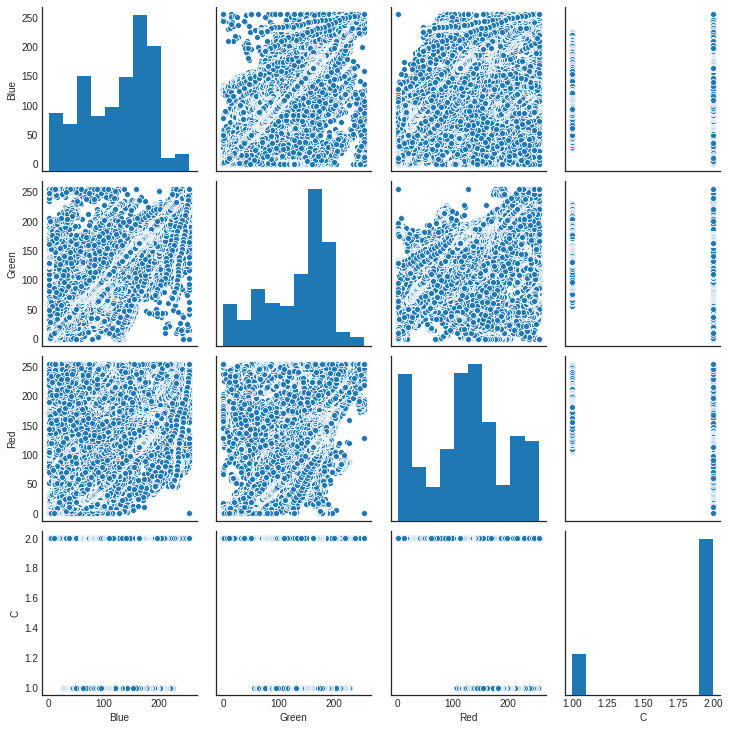

In [ ]:
#plotting scatter plot of features
sns.pairplot(data)

Principle Componant Analysis 

In [ ]:
Xp = pd.DataFrame(scale(data), index=data.index, columns=data.columns)

In [ ]:
pca_loadings = pd.DataFrame(PCA().fit(Xp).components_.T, index=data.columns, columns=['V1', 'V2', 'V3','V4'])
pca_loadings

,V1,V2,V3,V4
Blue,-0.532786,-0.438430,-0.320739,0.648880
Green,-0.594468,-0.235527,-0.195104,-0.743687
Red,-0.553872,0.332306,0.750345,0.140646
C,0.236587,-0.801174,0.544098,-0.078126


In [ ]:
# Fit the PCA model and transform X to get the principal components
pca = PCA()
data_plot = pd.DataFrame(pca.fit_transform(Xp), columns=['PC1', 'PC2', 'PC3', 'PC4'], index=Xp.index)
data_plot

,PC1,PC2,PC3,PC4
0,0.447222,2.111028,-0.647313,0.209494
1,0.473331,2.117420,-0.649247,0.209540
2,0.499440,2.123812,-0.651181,0.209586
3,0.551657,2.136596,-0.655049,0.209678
4,0.551657,2.136596,-0.655049,0.209678
...,...,...,...,...
245052,-0.410750,-0.844228,-0.128570,-0.032174
245053,-0.410750,-0.844228,-0.128570,-0.032174
245054,-0.410750,-0.844228,-0.128570,-0.032174
245055,-0.410750,-0.844228,-0.128570,-0.032174


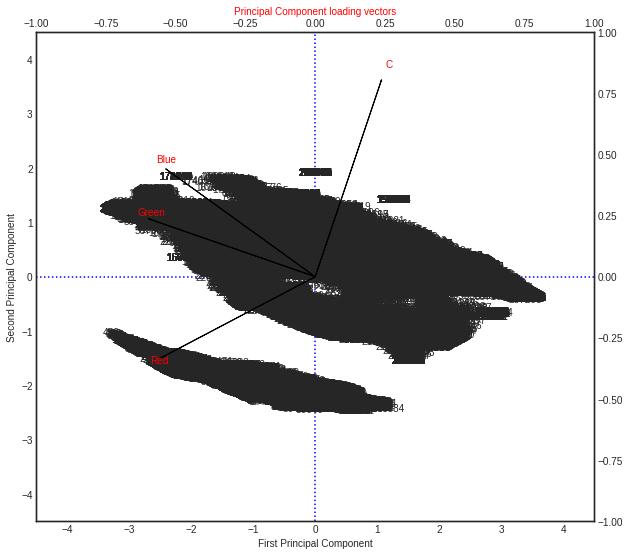

In [ ]:
fig , ax1 = plt.subplots(figsize=(10,9))

ax1.set_xlim(-4.5,4.5)
ax1.set_ylim(-4.5,4.5)

# Plot Principal Components 1 and 2
for i in data_plot.index:
    ax1.annotate(i, (data_plot.PC1.loc[i], -data_plot.PC2.loc[i]), ha='center')

# Plot reference lines
ax1.hlines(0,-4.5,4.5, linestyles='dotted', colors='blue')
ax1.vlines(0,-4.5,4.5, linestyles='dotted', colors='blue')

ax1.set_xlabel('First Principal Component')
ax1.set_ylabel('Second Principal Component')
    
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny() 

ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.tick_params(axis='y', colors='red')
ax2.set_xlabel('Principal Component loading vectors', color='red')

# Plot labels for vectors. Variable 'a' is a small offset parameter to separate arrow tip and text.
a = 1.07  
for i in pca_loadings[['V1', 'V2']].index:
    ax2.annotate(i, (pca_loadings.V1.loc[i]*a, -pca_loadings.V2.loc[i]*a), color='red')

# Plot vectors
ax2.arrow(0,0,pca_loadings.V1[0], -pca_loadings.V2[0])
ax2.arrow(0,0,pca_loadings.V1[1], -pca_loadings.V2[1])
ax2.arrow(0,0,pca_loadings.V1[2], -pca_loadings.V2[2])
ax2.arrow(0,0,pca_loadings.V1[3], -pca_loadings.V2[3]);

In [ ]:
# Standard deviation of the four principal components
np.sqrt(pca.explained_variance_)

array([1.55866233, 1.11865863, 0.45043324, 0.34102905])

In [ ]:
pca.explained_variance_

array([2.42942827, 1.25139713, 0.20289011, 0.11630081])

In [ ]:
pca.explained_variance_ratio_

array([0.60735459, 0.31284801, 0.05072232, 0.02907508])

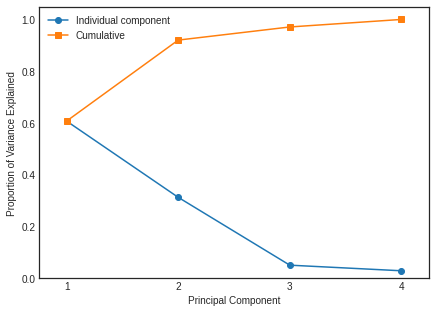

In [ ]:
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

#  C) Dataset Cleaning

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print("IQR is\n", IQR)
#There is no Outlier in the dataset

IQR is
 Blue     108.0
Green     90.0
Red       94.0
C          0.0
dtype: float64


# D)RelatedWork

1. Efficient Skin Region Segmentation using Low
Complexity Fuzzy Decision Tree Model
https://users.cecs.anu.edu.au/~adhall/INDICON.pdf

2. Adaptive Digital Makeup
https://users.cecs.anu.edu.au/~adhall/DhallSharmaBhattKhanISVC2009.pdf


# E) Feature Extraction

**5.1 Comparing Pearson Correlation**



In [ ]:
corr_matrix = data.corr()     #computing correlation between features and output
print(corr_matrix)

           Blue     Green       Red         C
Blue   1.000000  0.855250  0.496376  0.092030
Green  0.855250  1.000000  0.660098 -0.120327
Red    0.496376  0.660098  1.000000 -0.569958
C      0.092030 -0.120327 -0.569958  1.000000


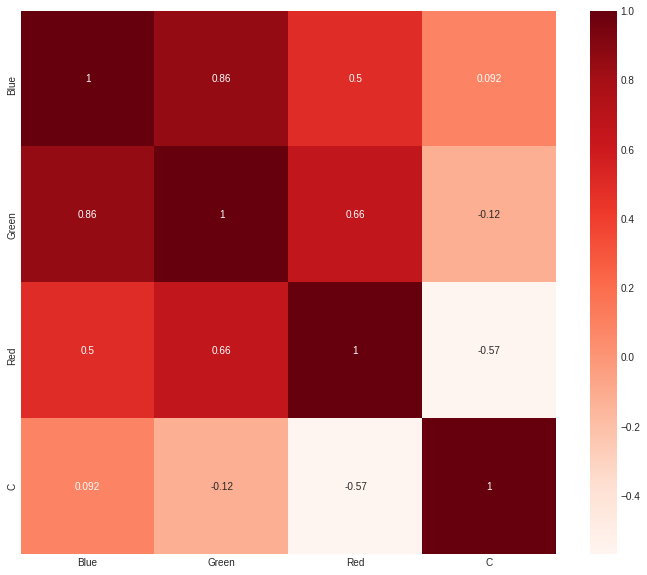

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

**5.2 Recursive feature elimination**


In [ ]:
model_logistic = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
sel_rfe_logistic = RFE(estimator=model_logistic, n_features_to_select=4, step=1)
X_train_rfe_logistic = sel_rfe_logistic.fit_transform(X_train, y_train)
print("Feature 1,2, and 3 are selected by this model",sel_rfe_logistic.get_support())
#ALL elements in the array are true, which means ALL features were selected by this method.

Feature 1,2, and 3 are selected by this model [ True  True  True]


**Ridge Regression**

related to part g)

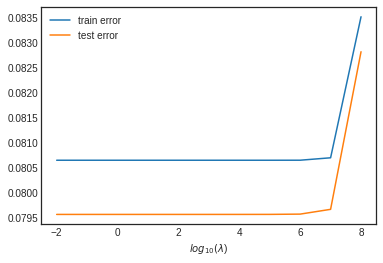

In [ ]:
#Ridge regression λ = 10 − 2 to10 8
n=np.linspace(-2,8,11)
lmbd=10**n
coeff=np.zeros((3,len(lmbd)))#coeff=np.zeros((19,len(lmbd)))
train_err=np.zeros(len(lmbd))
test_err=np.zeros(len(lmbd))
for i in range(len(lmbd)):
    regr = skl_lm.Ridge(alpha=lmbd[i])
    regr.fit(X_train, y_train)
    coeff[:,i]=regr.coef_
    y_pred_train = regr.predict(X_train)
    train_err[i]= mean_squared_error(y_train,y_pred_train)
    y_pred_test = regr.predict(X_test)
    test_err[i]= mean_squared_error(y_test,y_pred_test)
plt.plot(n,train_err)
plt.plot(n,test_err)
plt.xlabel('$log_{10}(\lambda$)')
plt.legend(['train error','test error'])

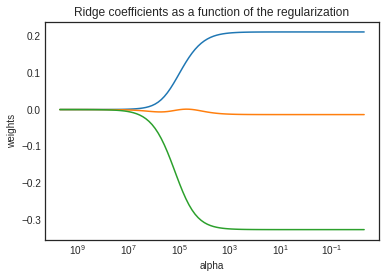

In [ ]:
alphas = 10**np.linspace(10,-2,100)*0.5

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X), y)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization');
#by increasing alpha, coefficients get larger

In [ ]:
plt.plot(n,train_err)
plt.plot(n,test_err)
plt.xlabel('$log_{10}(\lambda$)')
plt.legend(['train error','test error'])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

Alpha=4

In [ ]:
ridge2 = Ridge(alpha=len(X)*11498/2)
ridge2.fit(scaler.transform(X_train), y_train)
pred = ridge2.predict(scaler.transform(X_test))
mean_squared_error(y_test, pred)
print('test error = ', mean_squared_error(y_test, pred))

test error =  0.16510743861407787


In [ ]:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

Blue     0.000005
Green   -0.000006
Red     -0.000028
dtype: float64

Alpha=10

In [ ]:
ridge2.set_params(alpha=10**10)
ridge2.fit(scale(X_train), y_train)
pred = ridge2.predict(scale(X_test))
mean_squared_error(y_test, pred)
print('test error = ', mean_squared_error(y_test, pred))

test error =  0.16511946909490818


In [ ]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train)

RidgeCV(alphas=array([5.00000000e+09, 3.78231664e+09, 2.86118383e+09, 2.16438064e+09,
       1.63727458e+09, 1.23853818e+09, 9.36908711e+08, 7.08737081e+08,
       5.36133611e+08, 4.05565415e+08, 3.06795364e+08, 2.32079442e+08,
       1.75559587e+08, 1.32804389e+08, 1.00461650e+08, 7.59955541e+07,
       5.74878498e+07, 4.34874501e+07, 3.28966612e+07, 2.48851178e+07,
       1.88246790e+07, 1.42401793e+0...
       3.28966612e-01, 2.48851178e-01, 1.88246790e-01, 1.42401793e-01,
       1.07721735e-01, 8.14875417e-02, 6.16423370e-02, 4.66301673e-02,
       3.52740116e-02, 2.66834962e-02, 2.01850863e-02, 1.52692775e-02,
       1.15506485e-02, 8.73764200e-03, 6.60970574e-03, 5.00000000e-03]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [ ]:
ridgecv.alpha_

21.643806405415308

In [ ]:
ridge2.set_params(alpha=ridgecv.alpha_)
ridge2.fit(scale(X_train), y_train)
mean_squared_error(y_test, ridge2.predict(scale(X_test)))

0.07956654011262156

In [ ]:
pd.Series(ridge2.coef_.flatten(), index=X.columns)

Blue     0.210125
Green   -0.012691
Red     -0.325927
dtype: float64

**5.3 Lasso Regression**

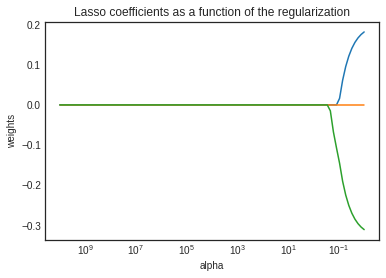

In [ ]:
lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas*2:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization');

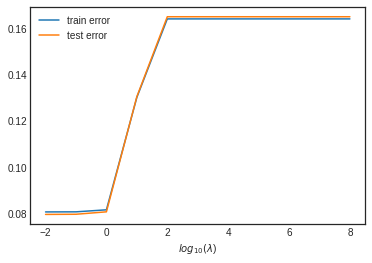

In [ ]:
plt.plot(n,train_err)
plt.plot(n,test_err)
plt.xlabel('$log_{10}(\lambda$)')
plt.legend(['train error','test error'])

In [ ]:
lassocv = LassoCV(alphas=None, cv=10, max_iter=10000)
lassocv.fit(scale(X_train), y_train.values.ravel())

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=10000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [ ]:
lassocv.alpha_

0.00023011389189471216

In [ ]:
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train), y_train)
mean_squared_error(y_test, lasso.predict(scale(X_test)))

0.07957137853234084

In [ ]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Blue     0.208702
Green   -0.011182
Red     -0.326028
dtype: float64

**Cross Validation**

# f) Model development

**1. Linear Regression**

In [ ]:
LR = LogisticRegression(solver='newton-cg',penalty='none',max_iter=50)
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

              precision    recall  f1-score   support

           1       0.79      0.82      0.81     35519
           2       0.95      0.94      0.95    136020

    accuracy                           0.92    171539
   macro avg       0.87      0.88      0.88    171539
weighted avg       0.92      0.92      0.92    171539

Logistic Regression training Score =  0.9202916292608613


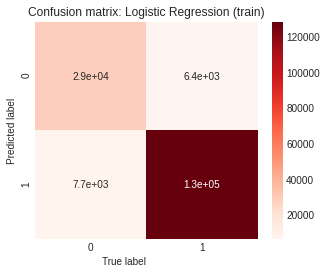

In [ ]:
#Training
y_pred_LR_train = LR.predict(X_train)
print(classification_report(y_train, y_pred_LR_train))
print('Logistic Regression training Score = ', LR.score(X_test, y_test))
#Plotting Confusion Matrix of LR
plt.figure(figsize=(5,4))
conf1 = confusion_matrix(y_train, y_pred_LR_train)
sns.heatmap(conf1, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Logistic Regression (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.75      0.82      0.78     15340
           2       0.95      0.93      0.94     58178

    accuracy                           0.91     73518
   macro avg       0.85      0.87      0.86     73518
weighted avg       0.91      0.91      0.91     73518

Logistic Regression test Score =  0.9052885007753203


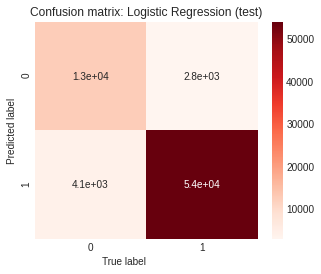

In [ ]:
#Testing
y_pred_LR_test = LR.predict(X_test)
print(classification_report(y_test, y_pred_LR_test))
print('Logistic Regression test Score = ', LR.score(X_test, y_test))
#Plotting Confusion Matrix of LR
plt.figure(figsize=(5,4))
conf1 = confusion_matrix(y_test, y_pred_LR_test)
sns.heatmap(conf1, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Logistic Regression (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

**2.1 LinearDiscriminantAnalysis**

In [ ]:
#Linear Discriminant Analysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

              precision    recall  f1-score   support

           1       0.79      0.90      0.84     35519
           2       0.97      0.94      0.96    136020

    accuracy                           0.93    171539
   macro avg       0.88      0.92      0.90    171539
weighted avg       0.94      0.93      0.93    171539

LDA train Score =  0.9310302613399868


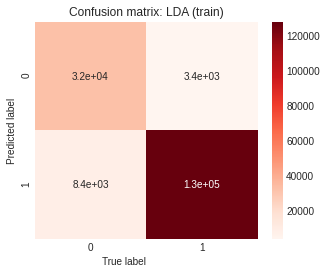

In [ ]:
#Training
y_pred_LDA_train = LDA.predict(X_train)
print(classification_report(y_train, y_pred_LDA_train))
print('LDA train Score = ', LDA.score(X_train, y_train))

#Plotting Confusion Matrix of LDA
plt.figure(figsize=(5,4))
conf21 = confusion_matrix(y_train, y_pred_LDA_train)
sns.heatmap(conf21, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: LDA (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.80      0.91      0.85     15340
           2       0.97      0.94      0.96     58178

    accuracy                           0.93     73518
   macro avg       0.89      0.92      0.90     73518
weighted avg       0.94      0.93      0.93     73518

LDA test Score =  0.9326559482031611


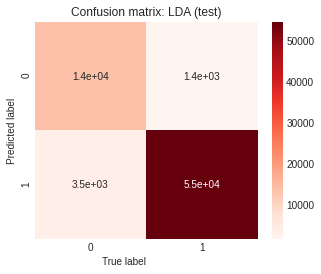

In [ ]:
#Testing
y_pred_LDA_test = LDA.predict(X_test)

print(classification_report(y_test, y_pred_LDA_test))
print('LDA test Score = ', LDA.score(X_test, y_test))

#Plotting Confusion Matrix of LDA
plt.figure(figsize=(5,4))
conf21 = confusion_matrix(y_test, y_pred_LDA_test)
sns.heatmap(conf21, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: LDA (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

**2.2 Quadratic Discriminant Analysis**

In [ ]:
QDA = QuadraticDiscriminantAnalysis()
QDA.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

              precision    recall  f1-score   support

           1       0.99      0.93      0.96     35519
           2       0.98      1.00      0.99    136020

    accuracy                           0.98    171539
   macro avg       0.99      0.96      0.97    171539
weighted avg       0.98      0.98      0.98    171539

Quadratic Regression train Score =  0.9835897376106891


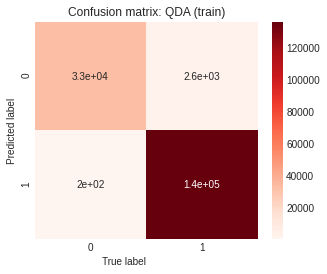

In [ ]:
#Training
y_pred_QDA_train = QDA.predict(X_train)

print(classification_report(y_train, y_pred_QDA_train))
print('Quadratic Regression train Score = ', QDA.score(X_train, y_train))
#Plotting Confusion Matrix of QDA
plt.figure(figsize=(5,4))
conf22 = confusion_matrix(y_train, y_pred_QDA_train)
sns.heatmap(conf22, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: QDA (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.99      0.93      0.96     15340
           2       0.98      1.00      0.99     58178

    accuracy                           0.98     73518
   macro avg       0.99      0.96      0.98     73518
weighted avg       0.98      0.98      0.98     73518

Quadratic Regression test Score =  0.983990315296934


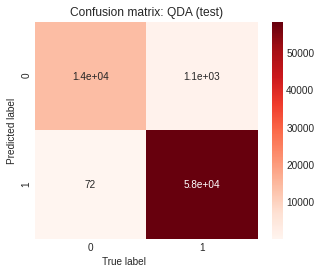

In [ ]:
#Testing
y_pred_QDA_test = QDA.predict(X_test)

print(classification_report(y_test, y_pred_QDA_test))

print('Quadratic Regression test Score = ', QDA.score(X_test, y_test))
#Plotting Confusion Matrix of QDA
plt.figure(figsize=(5,4))
conf222 = confusion_matrix(y_test, y_pred_QDA_test)
sns.heatmap(conf222, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: QDA (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

**3. K-Nearest Neighbor**

3.1 K=1

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15340
           2       1.00      1.00      1.00     58178

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

KNN-1 training Score =  0.9999650225313194


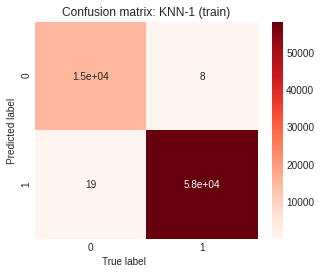

In [ ]:
#Training

knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
y_pred_knn1_train = knn1.fit(X_train, y_train).predict(X_test)
print(confusion_matrix(y_test, pred).T)
print(classification_report(y_test, pred, digits=3))


knn1 = neighbors.KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)
y_pred_knn1_train = knn1.predict(X_train)
print(classification_report(y_test, pred_knn1_train))
print('KNN-1 training Score = ', knn1.score(X_train, y_train))

#Plotting Confusion Matrix of KNN (test)
plt.figure(figsize=(5,4))
conf31 = confusion_matrix(y_test, pred_knn1_train)
sns.heatmap(conf31, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: KNN-1 (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()


In [ ]:
#Testing
knn1.fit(X_test, y_test)
pred_knn1_test = knn1.predict(X_test)
print(classification_report(y_test, pred_knn1_test))
print('KNN-1 test Score = ', knn1.score(X_test, y_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00     15340
           2       1.00      1.00      1.00     58178

    accuracy                           1.00     73518
   macro avg       1.00      1.00      1.00     73518
weighted avg       1.00      1.00      1.00     73518

KNN-1 test Score =  0.9999727957779048


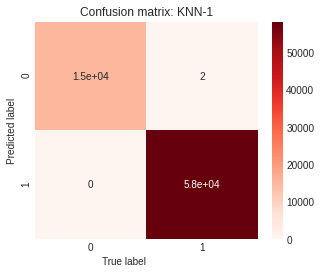

In [ ]:
#Plotting Confusion Matrix of KNN (test)
plt.figure(figsize=(5,4))
conf = confusion_matrix(y_test, pred_knn1_test)
sns.heatmap(conf, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: KNN-1')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

3.2 K=5

              precision    recall  f1-score   support

           1      0.998     1.000     0.999     15340
           2      1.000     1.000     1.000     58178

    accuracy                          1.000     73518
   macro avg      0.999     1.000     0.999     73518
weighted avg      1.000     1.000     1.000     73518

KNN-5 training Score =  0.9995511224852658


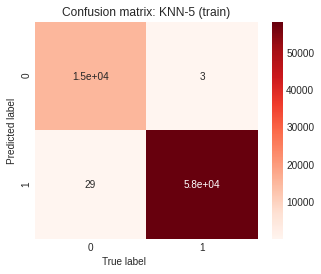

In [ ]:
#Training
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
pred_knn5_train = knn5.fit(X_train, y_train).predict(X_test)

print(classification_report(y_test, pred_knn5_train, digits=3))
print('KNN-5 training Score = ', knn5.score(X_train, y_train))
#Plotting Confusion Matrix of KNN (test)
plt.figure(figsize=(5,4))
conf33 = confusion_matrix(y_test, pred_knn5_train)
sns.heatmap(conf33, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: KNN-5 (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1      0.998     1.000     0.999     15340
           2      1.000     0.999     1.000     58178

    accuracy                          0.999     73518
   macro avg      0.999     1.000     0.999     73518
weighted avg      0.999     0.999     0.999     73518

KNN-5 test Score =  0.9994967218912375


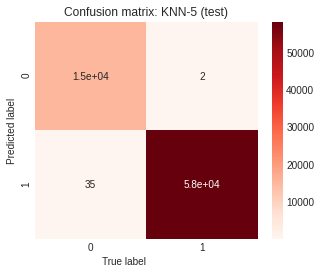

In [ ]:
#Testing
pred_knn5_test = knn5.fit(X_test, y_test).predict(X_test)

print(classification_report(y_test, pred_knn5_test, digits=3))
print('KNN-5 test Score = ', knn5.score(X_test, y_test))
#Plotting Confusion Matrix of KNN (test)
plt.figure(figsize=(5,4))
conf32 = confusion_matrix(y_test, pred_knn5_test)
sns.heatmap(conf32, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: KNN-5 (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

**4. Decision Trees**


In [ ]:
# This function creates images of tree models using pydot
def print_tree(estimator, features, class_names=None, filled=True):
    tree = estimator
    names = features
    color = filled
    classn = class_names
    
    dot_data = StringIO()
    export_graphviz(estimator, out_file=dot_data, feature_names=features, class_names=classn, filled=filled)
    graph = pydot.graph_from_dot_data(dot_data.getvalue())
    return(graph)

              precision    recall  f1-score   support

           1       0.89      0.96      0.92     35519
           2       0.99      0.97      0.98    136020

    accuracy                           0.97    171539
   macro avg       0.94      0.96      0.95    171539
weighted avg       0.97      0.97      0.97    171539

Decision train Score =  0.9657337398492472


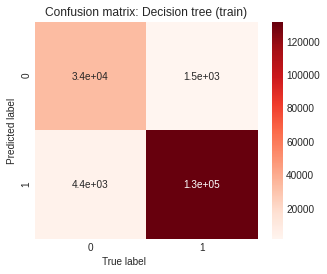

In [ ]:
DTC = DecisionTreeClassifier(max_depth=None, max_leaf_nodes=6, max_features=3)
DTC.fit(X_train,y_train)
y_pred_DTC_train = DTC.predict(X_train)
print(classification_report(y_train, y_pred_DTC_train))


print('Decision train Score = ', DTC.score(X_train, y_train))
#Plotting Confusion Matrix of DTC (test)
plt.figure(figsize=(5,4))
conf41 = confusion_matrix(y_train, y_pred_DTC_train)
sns.heatmap(conf41, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Decision tree (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

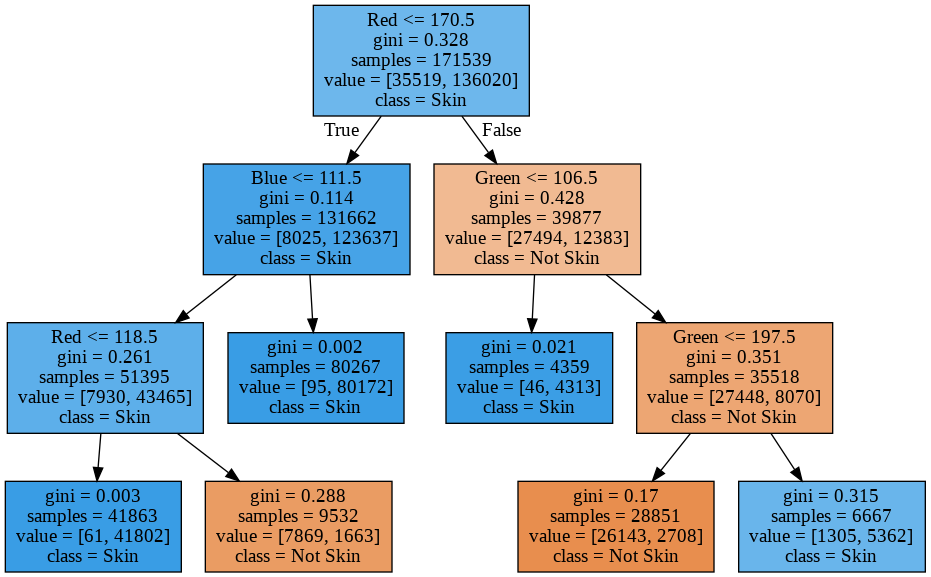

In [ ]:
graph2, = print_tree(DTC, features=X_train.columns, class_names=['Not Skin', 'Skin'])
Image(graph2.create_png())

              precision    recall  f1-score   support

           1       0.89      0.95      0.92     15340
           2       0.99      0.97      0.98     58178

    accuracy                           0.97     73518
   macro avg       0.94      0.96      0.95     73518
weighted avg       0.97      0.97      0.97     73518

Decision tree test Score =  0.9659947223809136


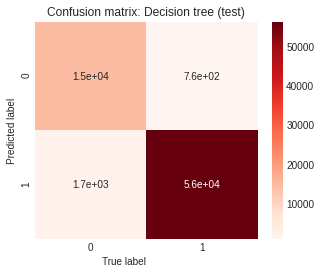

In [ ]:
DTC.fit(X_test,y_test)
y_pred_DTC_test = DTC.predict(X_test)
print(classification_report(y_test, y_pred_DTC_test))


print('Decision tree test Score = ', DTC.score(X_test, y_test))
#Plotting Confusion Matrix of DTC (test)
plt.figure(figsize=(5,4))
conf411 = confusion_matrix(y_test, y_pred_DTC_test)
sns.heatmap(conf411, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Decision tree (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

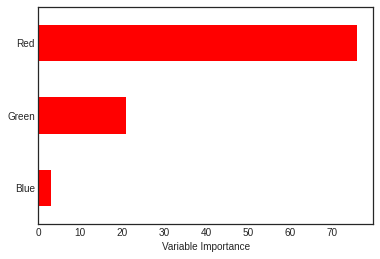

In [ ]:
Importance = pd.DataFrame({'Importance':DTC.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**5. Random Forest**

              precision    recall  f1-score   support

           1       0.85      0.63      0.72     35519
           2       0.91      0.97      0.94    136020

    accuracy                           0.90    171539
   macro avg       0.88      0.80      0.83    171539
weighted avg       0.90      0.90      0.90    171539

Random Forest train Score =  0.9010195932120393


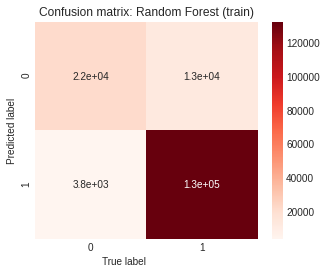

In [ ]:
RFC = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)

#training
RFC.fit(X_train, y_train)
y_pred_RF_train = RFC.predict(X_train)

print(classification_report(y_train, RFC.predict(X_train)))

print('Random Forest train Score = ', RFC.score(X_train, y_train))

#Plotting Confusion Matrix of RFC (test)
plt.figure(figsize=(5,4))
conf51 = confusion_matrix(y_train, y_pred_RF_train)
sns.heatmap(conf51, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Random Forest (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.86      0.64      0.73     15340
           2       0.91      0.97      0.94     58178

    accuracy                           0.90     73518
   macro avg       0.89      0.80      0.84     73518
weighted avg       0.90      0.90      0.90     73518

Random Forest test Score =  0.9028945292309366


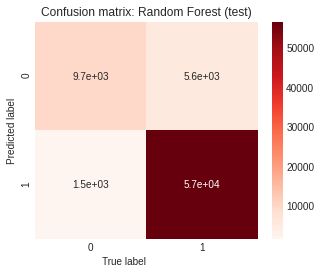

In [ ]:
#testing
RFC.fit(X_test, y_test)
y_pred_RF_test = RFC.predict(X_test)

print(classification_report(y_test, RFC.predict(X_test)))

print('Random Forest test Score = ', RFC.score(X_test, y_test))

#Plotting Confusion Matrix of RFC (test)
plt.figure(figsize=(5,4))
conf52 = confusion_matrix(y_test, y_pred_RF_test)
sns.heatmap(conf52, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Random Forest (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

# g) Fine-tune your models & Feature Set:

**1. Logistic Regression**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
#create new a LDA model
LRn = LogisticRegression()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_iter': np.arange(1, 100)}
#use gridsearch to test all values for regression parameter
LRn_gscv = GridSearchCV(LRn, param_grid, cv=5)
#fit model to data
LRn_gscv.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'max_iter': array([ 1,  2,  3,  4,  5,  6...12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75,

In [ ]:
#check top performing regression parameter value
LRn_gscv.best_params_

{'max_iter': 25}

In [ ]:
LRn_gscv.best_score_

0.9358640656659466

**2.1 Linear Discriminant Analysis**

In [ ]:
#create new a LDA model
LDAn = LinearDiscriminantAnalysis()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'tol': np.arange(0.00000000000001, 1)}
#use gridsearch to test all values for regression parameter
LDAn_gscv = GridSearchCV(LDAn, param_grid, cv=5)
#fit model to data
LDAn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=LinearDiscriminantAnalysis(n_components=None,
                                                  priors=None, shrinkage=None,
                                                  solver='svd',
                                                  store_covariance=False,
                                                  tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'tol': array([1.e-14])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing regression parameter value
LDAn_gscv.best_params_

{'tol': 1e-14}

In [ ]:
LDAn_gscv.best_score_

0.9315303847956372

**2.2 Quadratic Discriminant Analysis**

In [ ]:
#create new a QDA model
QDAn = QuadraticDiscriminantAnalysis()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'tol': np.arange(0.00000000001, 1)}
#use gridsearch to test all values for regression parameter
QDAn_gscv = GridSearchCV(QDAn, param_grid, cv=5)
#fit model to data
QDAn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                                                     store_covariance=False,
                                                     tol=0.0001),
             iid='deprecated', n_jobs=None, param_grid={'tol': array([1.e-11])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing regression parameter value
QDAn_gscv.best_params_

{'tol': 1e-11}

In [ ]:
#check mean score for the top performing value of regression parameter
QDAn_gscv.best_score_

0.9763077752039646

**3. KNN**

In [ ]:
#create new a knn model
knn2 = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 21}

In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.9925119836663168

**4. Decision Tree**

In [ ]:
#create new a Decision tree model
DTCn = DecisionTreeClassifier()
#create a dictionary of all values we want to test for max_depth
param_grid = {'max_depth': np.arange(1, 25)}
#use gridsearch to test all values for max_depths
DTCn_gscv = GridSearchCV(DTCn, param_grid, cv=5)
#fit model to data
DTCn_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [ ]:
#check top performing max_depth value
DTCn_gscv.best_params_

{'max_depth': 18}

In [ ]:
DTCn_gscv.best_score_

0.9762669502206845

**5. Random Forest**

In [ ]:
#create new a knn model
RFCnew = DecisionTreeClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'max_depth': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
RFCnew_gscv = GridSearchCV(RFCnew, param_grid, cv=5)
#fit model to data
RFCnew_gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [ ]:
#check top performing max_depth value
RFCnew_gscv.best_params_

{'max_depth': 14}

In [ ]:
RFCnew_gscv.best_score_

0.9763812153635838

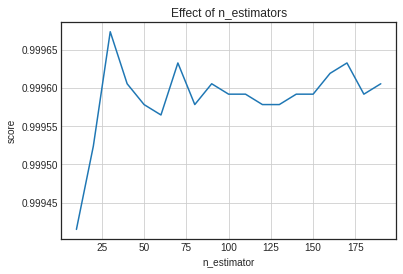

In [ ]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier(n_jobs=-1)
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.grid()
plt.plot(estimators, scores)

              precision    recall  f1-score   support

           1       0.86      0.64      0.73     35519
           2       0.91      0.97      0.94    136020

    accuracy                           0.90    171539
   macro avg       0.88      0.81      0.84    171539
weighted avg       0.90      0.90      0.90    171539

Random Forest train Score =  0.9029025469426778


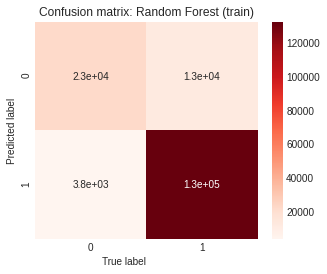

In [ ]:
RFCn = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=35)

#training
RFCn.fit(X_train, y_train)
y_pred_RFn_train = RFCn.predict(X_train)

print(classification_report(y_train, RFCn.predict(X_train)))

print('Random Forest train Score = ', RFCn.score(X_train, y_train))

#Plotting Confusion Matrix of RFC (test)
plt.figure(figsize=(5,4))
conf51 = confusion_matrix(y_train, y_pred_RFn_train)
sns.heatmap(conf51, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Random Forest (train)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

              precision    recall  f1-score   support

           1       0.86      0.64      0.73     15340
           2       0.91      0.97      0.94     58178

    accuracy                           0.90     73518
   macro avg       0.89      0.80      0.84     73518
weighted avg       0.90      0.90      0.90     73518

Random Forest test Score =  0.902880927119889


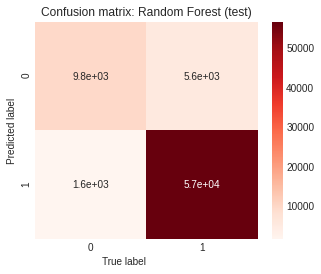

In [ ]:
#testing
RFCn.fit(X_test, y_test)
y_pred_RFn_test = RFCn.predict(X_test)

print(classification_report(y_test, RFCn.predict(X_test)))

print('Random Forest test Score = ', RFCn.score(X_test, y_test))

#Plotting Confusion Matrix of RFC (test)
plt.figure(figsize=(5,4))
conf522 = confusion_matrix(y_test, y_pred_RFn_test)
sns.heatmap(conf522, annot=True, cmap=plt.cm.Reds)
plt.title('Confusion matrix: Random Forest (test)')
plt.xlabel('True label',rotation='horizontal', ha='right')
plt.ylabel('Predicted label')
plt.show()

# e) Performance

In [ ]:
This part has been done in part f and g.
The report contains all the data.